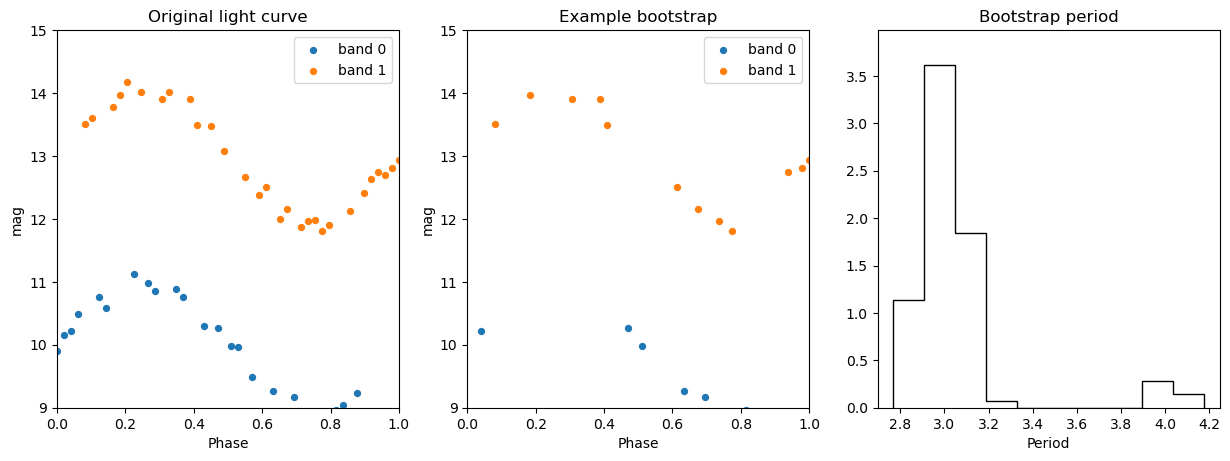

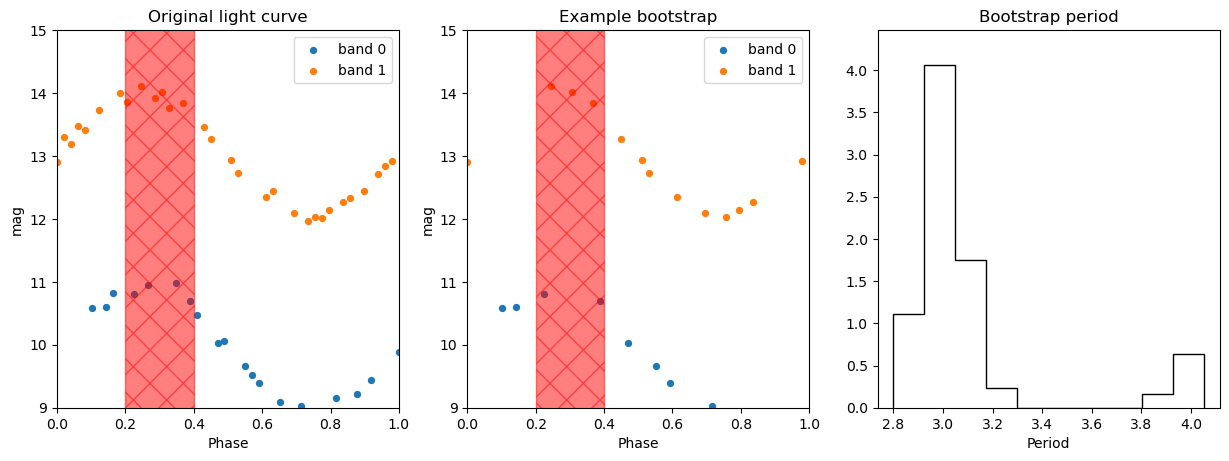

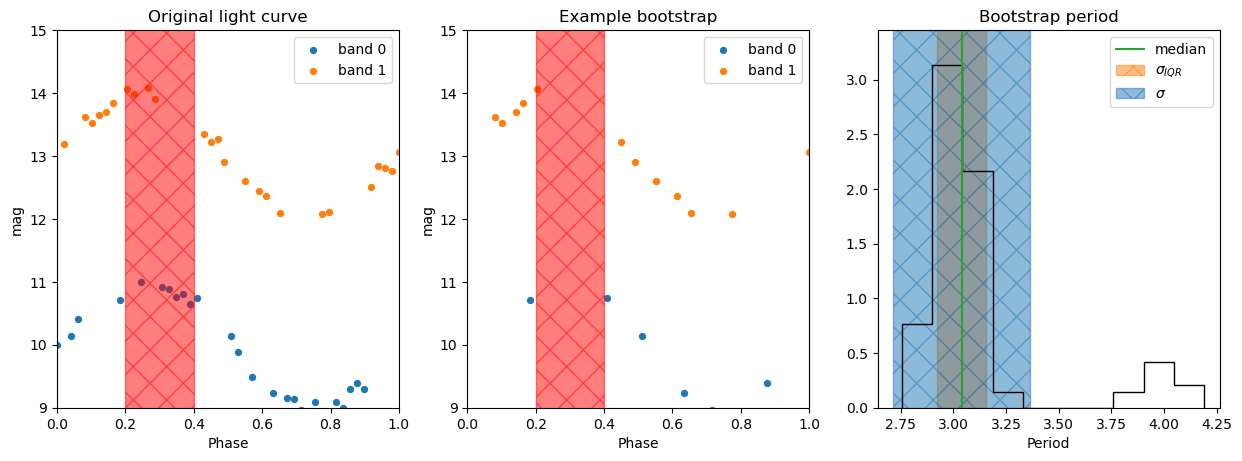

In [4]:
import sys; sys.path.insert(0, '..') 
from imports import *
def sim(window=False,stat=False):
    x = np.linspace(0,1)
    s = np.random.randint(0,2,x.size)
    y = np.sin(2*np.pi*x)+np.random.normal(0,0.1,x.size)+3*s+10
    fig, ax = plt.subplots(1,3,figsize=(15,5),dpi=100)
    T = np.random.binomial(1,0.4,size=x.size).astype(bool)
    I = np.arange(x.size)[T]
    cut = np.logical_and(s==0,T)
    ax[1].scatter(x[cut],y[cut],c='C0',s=18,label='band 0')
    cut = np.logical_and(s==1,T)
    ax[1].scatter(x[cut],y[cut],c='C1',s=18,label='band 1')
    ax[0].scatter(x[s==0],y[s==0],c='C0',s=18,label='band 0')
    ax[0].scatter(x[s==1],y[s==1],c='C1',s=18,label='band 1')
    for a in ax[:2]:
            if window:
                a.fill_between([0.2,0.4],[8,8],[16,16],color="r",hatch="X",alpha=0.5)
            a.set_xlabel('Phase')
            a.set_ylabel('mag')
            a.legend()
            a.set_xlim(0,1)
            a.set_ylim(9,15)
    ax[0].set_title('Original light curve')
    ax[1].set_title('Example bootstrap')
    ax[2].set_title('Bootstrap period')
    D = np.random.normal(3,0.1,100)+1*np.random.binomial(1,0.1,size=100)
    D1=ax[2].hist(D,10,histtype='step',density=True,color='k')
    ax[2].set_xlabel('Period')
    if stat:
        ax[2].axvline(np.median(D),color='C2',label='median')
        ax[2].fill_between([np.median(D)-med_sig(D),np.median(D)+med_sig(D)],[0,0],[1.1*D1[0].max(),1.1*D1[0].max()],color='C1',label=r'$\sigma_{IQR}$',alpha=0.5,hatch='x')
        ax[2].fill_between([np.median(D)-np.std(D),np.median(D)+np.std(D)],[0,0],[1.1*D1[0].max(),1.1*D1[0].max()],color='C0',label=r'$\sigma$',hatch='x',alpha=0.5)
        ax[2].legend()
    ax[2].set_ylim(0,1.1*D1[0].max())
    return fig
sim().savefig('Boot.jpg')
sim(True).savefig('Boot_wind.jpg')
sim(True,True).savefig('Boot_wind_stat.jpg')